In [125]:
# importing data & libraries
import kagglehub
from kagglehub import KaggleDatasetAdapter
import pandas as pd
import numpy as np 
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('SA_Aqar.csv')


In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3718 entries, 0 to 3717
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   city          3718 non-null   object
 1   district      3718 non-null   object
 2   front         3718 non-null   object
 3   size          3718 non-null   int64 
 4   property_age  3718 non-null   int64 
 5   bedrooms      3718 non-null   int64 
 6   bathrooms     3718 non-null   int64 
 7   livingrooms   3718 non-null   int64 
 8   kitchen       3718 non-null   int64 
 9   garage        3718 non-null   int64 
 10  driver_room   3718 non-null   int64 
 11  maid_room     3718 non-null   int64 
 12  furnished     3718 non-null   int64 
 13  ac            3718 non-null   int64 
 14  roof          3718 non-null   int64 
 15  pool          3718 non-null   int64 
 16  frontyard     3718 non-null   int64 
 17  basement      3718 non-null   int64 
 18  duplex        3718 non-null   int64 
 19  stairs

In [127]:
df.describe(include='all')

,city,district,front,size,property_age,bedrooms,bathrooms,livingrooms,kitchen,garage,...,roof,pool,frontyard,basement,duplex,stairs,elevator,fireplace,price,details
count,3718,3718,3718,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,...,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3.718000e+03,3638
unique,4,174,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1429
top,الخبر,حي ضاحية الملك فهد,شمال,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,مجمع ديار الروضة السكني يوفر لك جميع الخدمات و...
freq,976,173,917,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58
mean,NaN,NaN,NaN,390.968531,5.064820,5.083916,4.606509,2.243948,0.909360,0.802044,...,0.521517,0.162453,0.802582,0.034158,0.499462,0.814416,0.080958,0.181280,8.738797e+04,NaN
std,NaN,NaN,NaN,1565.056135,7.590427,1.230040,0.703449,0.916436,0.287135,0.398512,...,0.499604,0.368915,0.398104,0.181660,0.500067,0.388823,0.272807,0.385302,7.063470e+04,NaN
min,NaN,NaN,NaN,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+03,NaN
25%,NaN,NaN,NaN,280.000000,0.000000,4.000000,4.000000,2.000000,1.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,5.500000e+04,NaN
50%,NaN,NaN,NaN,330.000000,2.000000,5.000000,5.000000,2.000000,1.000000,1.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,7.000000e+04,NaN
75%,NaN,NaN,NaN,400.000000,7.000000,6.000000,5.000000,3.000000,1.000000,1.000000,...,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000e+05,NaN


# cleaning 

In [128]:
df.isnull().sum()

city             0
district         0
front            0
size             0
property_age     0
bedrooms         0
bathrooms        0
livingrooms      0
kitchen          0
garage           0
driver_room      0
maid_room        0
furnished        0
ac               0
roof             0
pool             0
frontyard        0
basement         0
duplex           0
stairs           0
elevator         0
fireplace        0
price            0
details         80
dtype: int64

In [129]:
df.sample(15)

,city,district,front,size,property_age,bedrooms,bathrooms,livingrooms,kitchen,garage,...,roof,pool,frontyard,basement,duplex,stairs,elevator,fireplace,price,details
169,الرياض,حي اليرموك,غرب,375,7,4,5,2,0,1,...,0,0,1,0,0,1,0,0,65000,فيلا درج داخلي ايجااااار\nحي اليرموك تحت استقب...
1390,جدة,حي الروضة,شرق,100,0,2,3,1,1,0,...,0,1,0,0,0,1,0,0,62000,مجمع ديار الروضة السكني يوفر لك جميع الخدمات و...
2079,الدمام,حي ضاحية الملك فهد,شمال,250,0,5,5,3,1,0,...,0,0,0,0,0,0,0,0,37000,فلا للايجار فى الحي الخامس التاسع \nتتكون ثلاث...
448,الرياض,حي الملك فهد,شرق,450,23,5,5,2,1,1,...,0,0,1,0,0,1,0,0,90000,فلة واجهة شرقية مكيفات راكبة مطبخ راكب درج صال...
3244,الخبر,حي الحزام الاخضر,جنوب,400,4,4,5,2,1,1,...,1,0,0,0,1,1,0,0,140000,٤غرف نوم منهم غرفتين ماستر \nمجلس وصاله ومطبخ ...
529,الرياض,حي الشرق,غرب,256,0,5,5,3,1,1,...,1,0,1,0,0,1,0,1,40000,‏فله درج داخلي أربع منها غرف وغرفة ماستر يوجد ...
1046,جدة,حي الرياض,جنوب,200,0,5,3,1,1,1,...,1,0,1,0,1,1,0,0,35000,فيلا للايجار في حي الرياض جديدة \nللاستفسار \n...
1503,جدة,حي البساتين,شرق,650,20,7,5,2,1,1,...,1,0,0,0,0,1,0,0,120000,فيلا للإيجار تنفع مكتب محاما او سكني مباشره ع...
1305,جدة,حي الخالدية,شرق,350,4,7,5,5,1,1,...,1,1,1,1,1,1,0,1,110000,العقار فيلا للايجار \nالمدينه جده /\nالحي الخا...
703,الرياض,حي القادسية,جنوب غربي,375,0,5,4,2,0,1,...,0,0,1,0,0,1,0,1,50000,فرررصه لكم العقار\n\nللايجار درج داخلي وشقتين ...


In [130]:
df.dropna(subset='details' , inplace= True)
count = len(df)
count

3638

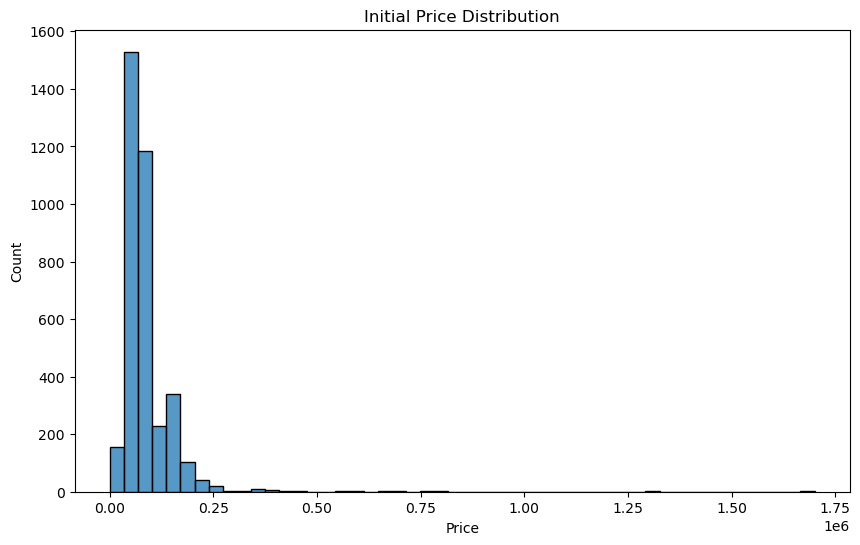

In [161]:
# Visualize initial price distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='price', bins=50)
plt.title('Initial Price Distribution')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

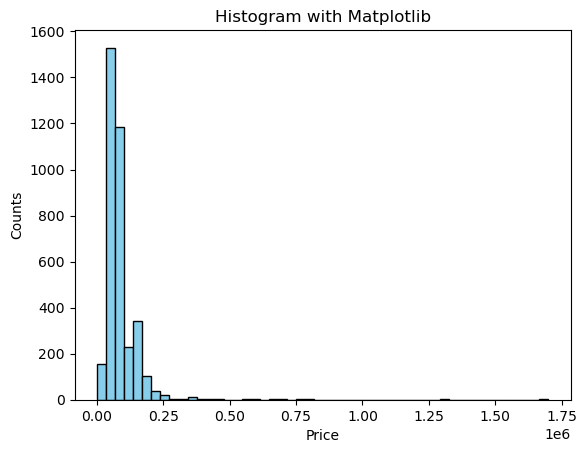

In [162]:
plt.hist(df['price'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Counts')
plt.title('Histogram with Matplotlib')
plt.show()